In [7]:
import tensorflow
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

# Classification with Neural Networks

* Some differences to regression models.
* Loss function: **categorical_crossentropy**, which is not the only option but most used one.
    * measures how similar your predictions are to the actual labels
* The lower the loss function the better the model, yet it is still hard to interpret them.
* Metrics: **accuracy, precision...** to better monitor and interpret model performance through epochs.
* Output layer: must match the number of different target categories.
* Activation function: for hidden layers **ReLU**, for output **softmax**: <br>
    * Predictions are summed to 1 - normalized
    * Output is large if the input is large.
    * Output is small if input is small.
    * The proportion is not uniform since it is exponential.
    * Turns predictions to probabilities which all sum together to 1.
    * Cross entropy is often computed for output of softmax and true labels.
    
$$\sigma(z)_j = \frac{e^{z_j}}{\sum_{k=1}^k e^{z_k}}$$


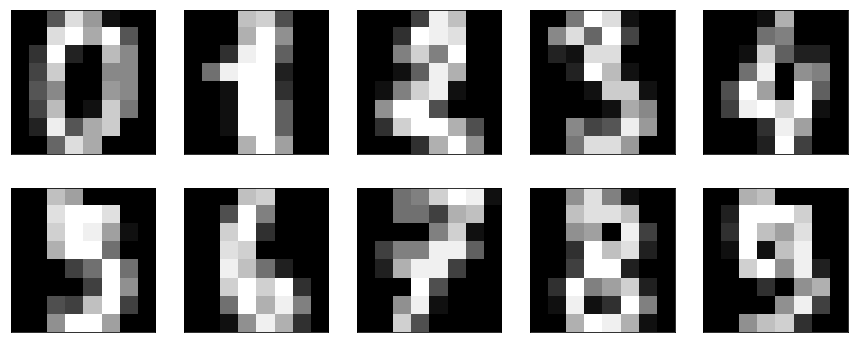

In [8]:
digits = sklearn.datasets.load_digits()
images = digits.images

# plot the target values
fig, axes = plt.subplots(2, 5, figsize=(15, 6), subplot_kw={'xticks': (),
                                          'yticks': ()})

for img, ax in zip(images, axes.ravel()):
    ax.imshow(img, cmap='gray', interpolation='nearest')
plt.show()

In [9]:
X = digits.data
y = to_categorical(digits.target) # creates each possible output its own column
                                  # changes shape from (n_rwos, ) to (n_rows, 10)

# building neural network layers
model = Sequential([
    Dense(100, activation='relu', input_shape=(X.shape[1],)),
    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
    Dense(len(digits.target_names), activation='softmax')
])

# compiling & fitting
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_f = model.fit(x=X, y=y, epochs=5, validation_split=0.3)

Train on 1257 samples, validate on 540 samples
Epoch 1/5
1257/1257 [==============================] - 0s 312us/step - loss: 1.3561 - acc: 0.6285 - val_loss: 0.5265 - val_acc: 0.8463
Epoch 2/5
1257/1257 [==============================] - 0s 78us/step - loss: 0.1918 - acc: 0.9523 - val_loss: 0.3167 - val_acc: 0.9037
Epoch 3/5
1257/1257 [==============================] - 0s 74us/step - loss: 0.0901 - acc: 0.9769 - val_loss: 0.2749 - val_acc: 0.9093
Epoch 4/5
1257/1257 [==============================] - 0s 71us/step - loss: 0.0594 - acc: 0.9825 - val_loss: 0.2623 - val_acc: 0.9111
Epoch 5/5
1257/1257 [==============================] - 0s 67us/step - loss: 0.0376 - acc: 0.9912 - val_loss: 0.2302 - val_acc: 0.9167


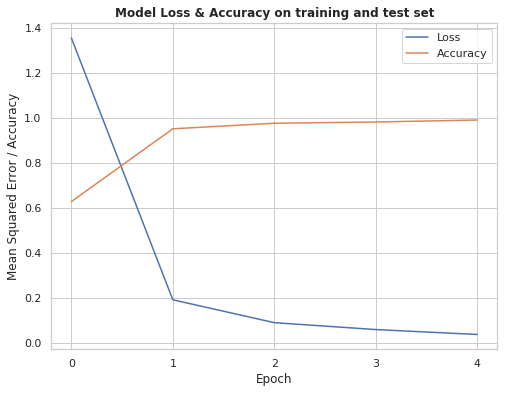

In [12]:
sns.set(style='whitegrid')
plt.figure(figsize=(8, 6))
plt.plot(model_f.history['loss'], label='Loss')
plt.plot(model_f.history['acc'], label='Accuracy')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error / Accuracy')
plt.title('Model Loss & Accuracy on training and test set', weight='bold')
plt.xticks(np.arange(0,5))
plt.show()

### Exercise on Titanic dataset. Predict surviving.

In [14]:
titanic = pd.read_csv('data/titanic_all_numeric.csv', header=0)
titanic.describe()

,survived,pclass,age,sibsp,parch,fare,male,embarked_from_cherbourg,embarked_from_queenstown,embarked_from_southampton
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.647587,0.188552,0.086420,0.722783
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429,0.477990,0.391372,0.281141,0.447876
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200,1.000000,0.000000,0.000000,1.000000
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000


In [17]:
# features and target
X = titanic.drop('survived', axis='columns')
y = to_categorical(titanic.survived)

# init model and add layers
titanic_model = Sequential([
    Dense(32, activation='relu', input_shape=(X.shape[1], )),
    Dense(32, activation='relu'),
    Dense(len(titanic.survived.unique()), activation='softmax')
])

# compile and fit
titanic_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
titanic_model_f = titanic_model.fit(x=X.values, y=y, validation_split=0.3, epochs=5)

Train on 623 samples, validate on 268 samples
Epoch 1/5
623/623 [==============================] - 0s 627us/step - loss: 2.1296 - acc: 0.5698 - val_loss: 1.1065 - val_acc: 0.3545
Epoch 2/5
623/623 [==============================] - 0s 62us/step - loss: 0.9216 - acc: 0.5666 - val_loss: 0.7135 - val_acc: 0.6791
Epoch 3/5
623/623 [==============================] - 0s 53us/step - loss: 0.7338 - acc: 0.5971 - val_loss: 0.6716 - val_acc: 0.6679
Epoch 4/5
623/623 [==============================] - 0s 54us/step - loss: 0.7005 - acc: 0.6132 - val_loss: 0.6165 - val_acc: 0.6866
Epoch 5/5
623/623 [==============================] - 0s 55us/step - loss: 0.6706 - acc: 0.6260 - val_loss: 0.6255 - val_acc: 0.6604


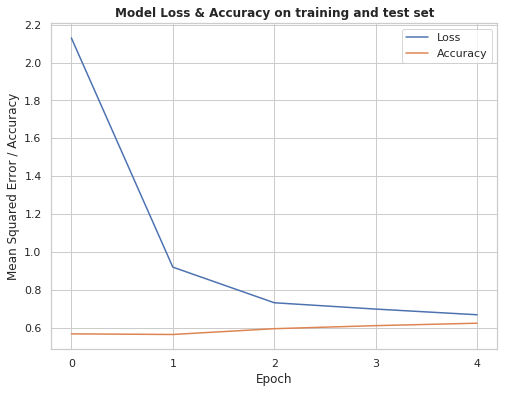

In [18]:
plt.figure(figsize=(8, 6))
plt.plot(titanic_model_f.history['loss'], label='Loss')
plt.plot(titanic_model_f.history['acc'], label='Accuracy')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error / Accuracy')
plt.title('Model Loss & Accuracy on training and test set', weight='bold')
plt.xticks(np.arange(0,5))
plt.show()

### Model structure

In [19]:
titanic_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 32)                352       
_________________________________________________________________
dense_5 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 66        
Total params: 1,474
Trainable params: 1,474
Non-trainable params: 0
_________________________________________________________________


# Saiving and Reloding models

In [20]:
# models are saved into ".h5" format
titanic_model.save('titanic_model.h5')

In [23]:
# loading model
my_model = tensorflow.keras.models.load_model('titanic_model.h5')

In [24]:
X_test = [[0]]

# making predicitons
y_pred = my_model.predict(X)

### Exercise on loading the model and using data to predict

In [39]:
# test data
pred_data = np.array([[2, 34.0, 0, 0, 13.0, 1, False, 0, 0, 1],
       [2, 31.0, 1, 1, 26.25, 0, False, 0, 0, 1],
       [1, 11.0, 1, 2, 120.0, 1, False, 0, 0, 1],
       [3, 0.42, 0, 1, 8.5167, 1, False, 1, 0, 0],
       [3, 27.0, 0, 0, 6.975, 1, False, 0, 0, 1],
       [3, 31.0, 0, 0, 7.775, 1, False, 0, 0, 1],
       [1, 39.0, 0, 0, 0.0, 1, False, 0, 0, 1],
       [3, 18.0, 0, 0, 7.775, 0, False, 0, 0, 1],
       [2, 39.0, 0, 0, 13.0, 1, False, 0, 0, 1],
       [1, 33.0, 1, 0, 53.1, 0, False, 0, 0, 1],
       [3, 26.0, 0, 0, 7.8875, 1, False, 0, 0, 1],
       [3, 39.0, 0, 0, 24.15, 1, False, 0, 0, 1],
       [2, 35.0, 0, 0, 10.5, 1, False, 0, 0, 1],
       [3, 6.0, 4, 2, 31.275, 0, False, 0, 0, 1],
       [3, 30.5, 0, 0, 8.05, 1, False, 0, 0, 1],
       [1, 29.69911764705882, 0, 0, 0.0, 1, True, 0, 0, 1],
       [3, 23.0, 0, 0, 7.925, 0, False, 0, 0, 1],
       [2, 31.0, 1, 1, 37.0042, 1, False, 1, 0, 0],
       [3, 43.0, 0, 0, 6.45, 1, False, 0, 0, 1],
       [3, 10.0, 3, 2, 27.9, 1, False, 0, 0, 1],
       [1, 52.0, 1, 1, 93.5, 0, False, 0, 0, 1],
       [3, 27.0, 0, 0, 8.6625, 1, False, 0, 0, 1],
       [1, 38.0, 0, 0, 0.0, 1, False, 0, 0, 1],
       [3, 27.0, 0, 1, 12.475, 0, False, 0, 0, 1],
       [3, 2.0, 4, 1, 39.6875, 1, False, 0, 0, 1],
       [3, 29.69911764705882, 0, 0, 6.95, 1, True, 0, 1, 0],
       [3, 29.69911764705882, 0, 0, 56.4958, 1, True, 0, 0, 1],
       [2, 1.0, 0, 2, 37.0042, 1, False, 1, 0, 0],
       [3, 29.69911764705882, 0, 0, 7.75, 1, True, 0, 1, 0],
       [1, 62.0, 0, 0, 80.0, 0, False, 0, 0, 0],
       [3, 15.0, 1, 0, 14.4542, 0, False, 1, 0, 0],
       [2, 0.83, 1, 1, 18.75, 1, False, 0, 0, 1],
       [3, 29.69911764705882, 0, 0, 7.2292, 1, True, 1, 0, 0],
       [3, 23.0, 0, 0, 7.8542, 1, False, 0, 0, 1],
       [3, 18.0, 0, 0, 8.3, 1, False, 0, 0, 1],
       [1, 39.0, 1, 1, 83.1583, 0, False, 1, 0, 0],
       [3, 21.0, 0, 0, 8.6625, 1, False, 0, 0, 1],
       [3, 29.69911764705882, 0, 0, 8.05, 1, True, 0, 0, 1],
       [3, 32.0, 0, 0, 56.4958, 1, False, 0, 0, 1],
       [1, 29.69911764705882, 0, 0, 29.7, 1, True, 1, 0, 0],
       [3, 20.0, 0, 0, 7.925, 1, False, 0, 0, 1],
       [2, 16.0, 0, 0, 10.5, 1, False, 0, 0, 1],
       [1, 30.0, 0, 0, 31.0, 0, False, 1, 0, 0],
       [3, 34.5, 0, 0, 6.4375, 1, False, 1, 0, 0],
       [3, 17.0, 0, 0, 8.6625, 1, False, 0, 0, 1],
       [3, 42.0, 0, 0, 7.55, 1, False, 0, 0, 1],
       [3, 29.69911764705882, 8, 2, 69.55, 1, True, 0, 0, 1],
       [3, 35.0, 0, 0, 7.8958, 1, False, 1, 0, 0],
       [2, 28.0, 0, 1, 33.0, 1, False, 0, 0, 1],
       [1, 29.69911764705882, 1, 0, 89.1042, 0, True, 1, 0, 0],
       [3, 4.0, 4, 2, 31.275, 1, False, 0, 0, 1],
       [3, 74.0, 0, 0, 7.775, 1, False, 0, 0, 1],
       [3, 9.0, 1, 1, 15.2458, 0, False, 1, 0, 0],
       [1, 16.0, 0, 1, 39.4, 0, False, 0, 0, 1],
       [2, 44.0, 1, 0, 26.0, 0, False, 0, 0, 1],
       [3, 18.0, 0, 1, 9.35, 0, False, 0, 0, 1],
       [1, 45.0, 1, 1, 164.8667, 0, False, 0, 0, 1],
       [1, 51.0, 0, 0, 26.55, 1, False, 0, 0, 1],
       [3, 24.0, 0, 3, 19.2583, 0, False, 1, 0, 0],
       [3, 29.69911764705882, 0, 0, 7.2292, 1, True, 1, 0, 0],
       [3, 41.0, 2, 0, 14.1083, 1, False, 0, 0, 1],
       [2, 21.0, 1, 0, 11.5, 1, False, 0, 0, 1],
       [1, 48.0, 0, 0, 25.9292, 0, False, 0, 0, 1],
       [3, 29.69911764705882, 8, 2, 69.55, 0, True, 0, 0, 1],
       [2, 24.0, 0, 0, 13.0, 1, False, 0, 0, 1],
       [2, 42.0, 0, 0, 13.0, 0, False, 0, 0, 1],
       [2, 27.0, 1, 0, 13.8583, 0, False, 1, 0, 0],
       [1, 31.0, 0, 0, 50.4958, 1, False, 0, 0, 1],
       [3, 29.69911764705882, 0, 0, 9.5, 1, True, 0, 0, 1],
       [3, 4.0, 1, 1, 11.1333, 1, False, 0, 0, 1],
       [3, 26.0, 0, 0, 7.8958, 1, False, 0, 0, 1],
       [1, 47.0, 1, 1, 52.5542, 0, False, 0, 0, 1],
       [1, 33.0, 0, 0, 5.0, 1, False, 0, 0, 1],
       [3, 47.0, 0, 0, 9.0, 1, False, 0, 0, 1],
       [2, 28.0, 1, 0, 24.0, 0, False, 1, 0, 0],
       [3, 15.0, 0, 0, 7.225, 0, False, 1, 0, 0],
       [3, 20.0, 0, 0, 9.8458, 1, False, 0, 0, 1],
       [3, 19.0, 0, 0, 7.8958, 1, False, 0, 0, 1],
       [3, 29.69911764705882, 0, 0, 7.8958, 1, True, 0, 0, 1],
       [1, 56.0, 0, 1, 83.1583, 0, False, 1, 0, 0],
       [2, 25.0, 0, 1, 26.0, 0, False, 0, 0, 1],
       [3, 33.0, 0, 0, 7.8958, 1, False, 0, 0, 1],
       [3, 22.0, 0, 0, 10.5167, 0, False, 0, 0, 1],
       [2, 28.0, 0, 0, 10.5, 1, False, 0, 0, 1],
       [3, 25.0, 0, 0, 7.05, 1, False, 0, 0, 1],
       [3, 39.0, 0, 5, 29.125, 0, False, 0, 1, 0],
       [2, 27.0, 0, 0, 13.0, 1, False, 0, 0, 1],
       [1, 19.0, 0, 0, 30.0, 0, False, 0, 0, 1],
       [3, 29.69911764705882, 1, 2, 23.45, 0, True, 0, 0, 1],
       [1, 26.0, 0, 0, 30.0, 1, False, 1, 0, 0],
       [3, 32.0, 0, 0, 7.75, 1, False, 0, 1, 0]])

# loading the model
titanic_mod = tensorflow.keras.models.load_model('titanic_model.h5')

# predicting, outputs probabilities for not survving &
# survivng, in that order
y_pred = titanic_mod.predict(X)

# probabilities for passenger to survive:
survived = y_pred[:,1]
print('Out of {} passengers {} had survivng probability higher than 50%'.format(
    y_pred.shape[0], (survived > 0.5).sum()))

Out of 891 passengers 147 had survivng probability higher than 50%
